In [6]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')


In [7]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\happiness_score_dataset.csv')
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [8]:
#Trying to see the value of Happiness Score for the least Ranking Countries

df.tail()



Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
# No null values
# dtypes: float64(9), int64(1), object(2)

In [10]:
df.shape

# 158 rows and  12 column

(158, 12)

In [11]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
#Statistical Summary
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [ ]:
# No missing Value
# There is no significance diffrence between mean and median
# Not able to reach at conclusion on  Outlier after analysing  Mean,Meaidan for each features


In [13]:
# Checking null value in Dataset

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [14]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [ ]:
# There is no null value

In [15]:
# Checking Null Value for categorical Variable

df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
# checking correlation

corr_mat=df.corr() # Multivariate
corr_mat


Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000                 -0.217651   
Economy (GDP per Capita)            -0.217651                  1.000000   
Family                              -0.120728                  0.645299   
Health (Life Expectancy)            -0.310287                  0.816478   
Freedom                             -0.129773                  0.370300   
Trust (Government Corruption)       -0.178325                  0.307885   
Generosity                          -0.088439                 -0.010465   
Dystopia Residual                    0.083981                  0.040059   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Rank                -0.733644                 -0.735613 -0.556886   
Happiness Score                0.740605                  0.724200  0.568211   
Standard Error                -0.120728                 -0.310287 -0.129773   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477   
Freedom                        0.441518                  0.360477  1.000000   
Trust (Government Corruption)  0.205605                  0.248335  0.493524   
Generosity                     0.087513                  0.108335  0.373916   
Dystopia Residual              0.148117                  0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.372315   -0.160142   
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Rank                         -0.521999  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

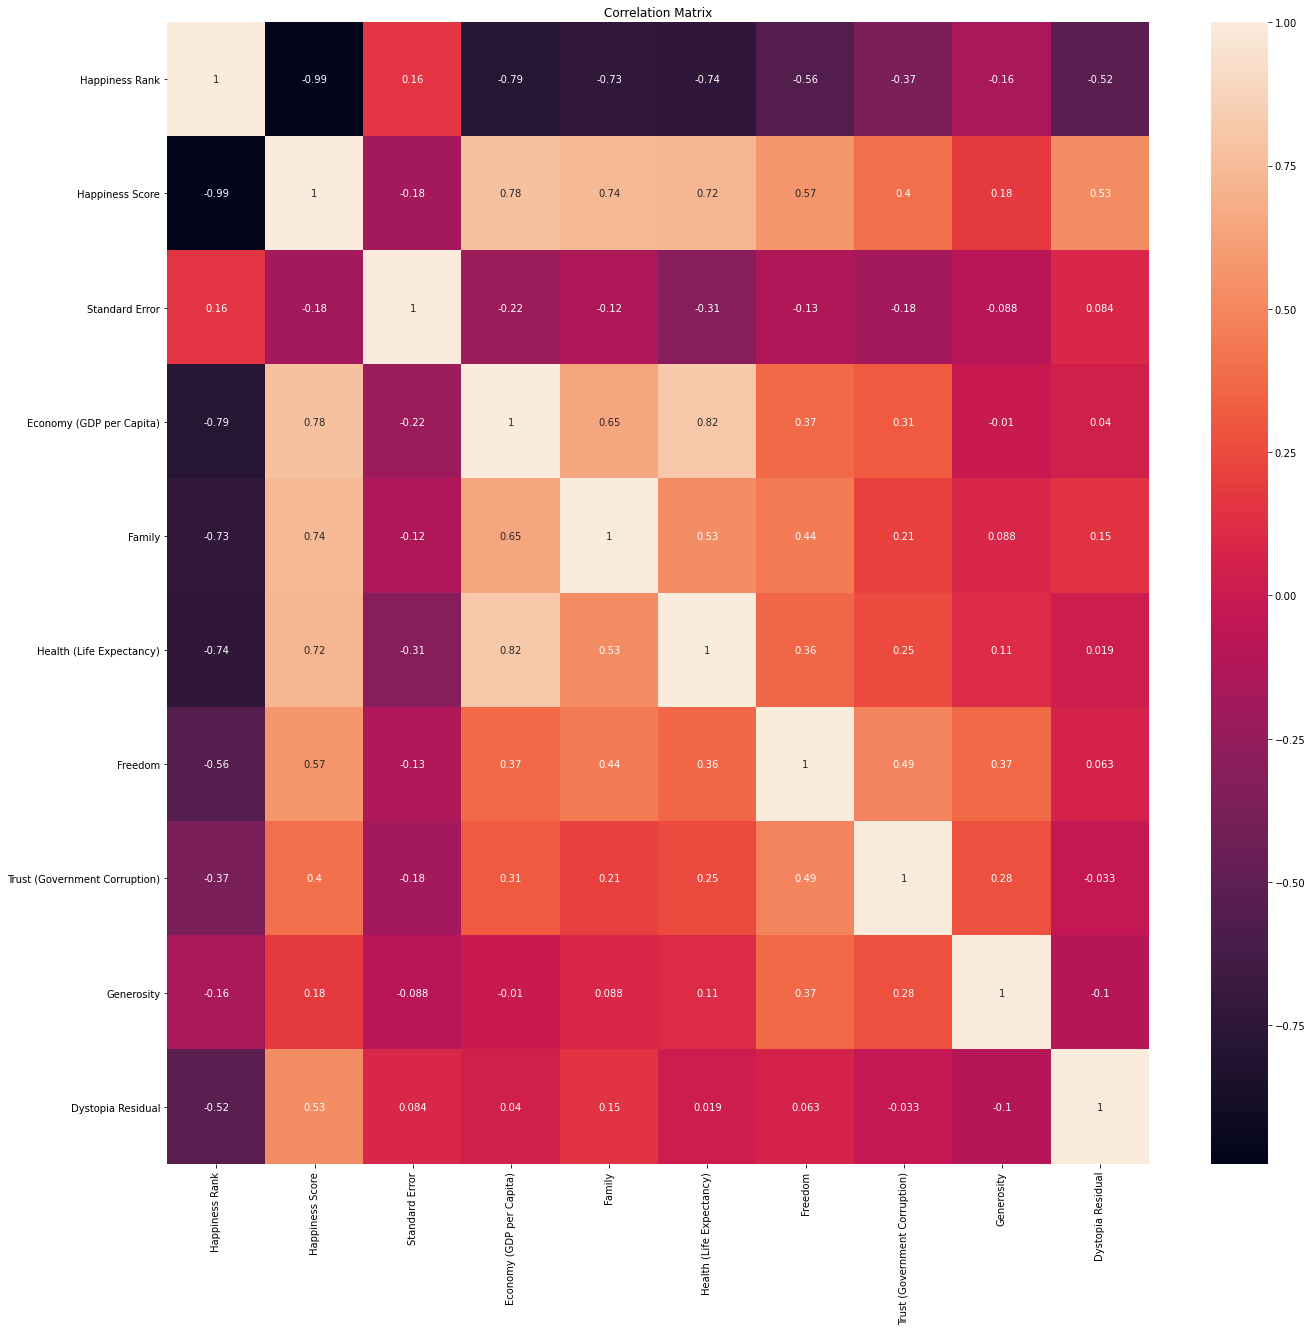

In [21]:
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# from hetamap,we found the strong co-relation score is 0.99 of Happiness Rank and Happiness Score
#Our Target variable is Happiness Score

In [25]:
# Lets see co relation score in tabular form
corr_mat=df.corr()
corr_mat['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [ ]:
Now we can easily identify the corelation of independent variable with dependent variable, Happiness Rank's value is -0.99 


In [ ]:
preparing Model without dropping any single variable and wil see the model confidance if coming low then try to drop as per 
its corelation value 

In [16]:
# popping the features which are not significant in model
data=df.drop(columns=['Country','Region'])
data.head()

Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0               1            7.587         0.03411                   1.39651   
1               2            7.561         0.04884                   1.30232   
2               3            7.527         0.03328                   1.32548   
3               4            7.522         0.03880                   1.45900   
4               5            7.427         0.03553                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [ ]:
# Lets check data distribution among all the columns 

In [17]:
#EDA

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()     

In [26]:
#Lets see all columns
data.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
#After looking distplot,There are right and left skewed featues in dataset

#Right Skewed features -Economy (GDP per Capita),Health (Life Expectancy),'Family',Freedom

# Left Skewed features -Standard Error,Trust (Government Corruption),Generosity


In [27]:
#splitting the independent and target variable in x and y
y=data['Happiness Score']
x=data.drop(columns=['Happiness Score'])

In [28]:
#checking skewness
x.skew()

Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
#There are 5 features who is either greater than 0.5 or less than -0.5

In [ ]:
#we can see skewness in the dataset. we can remove the skewness using power transforn function

In [52]:
x1=df[['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']]
x1.head()
x2=df.drop(columns=['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity','Country','Region'],axis=1)
x2.head()

Happiness Rank  Happiness Score  Economy (GDP per Capita)  Freedom  \
0               1            7.587                   1.39651  0.66557   
1               2            7.561                   1.30232  0.62877   
2               3            7.527                   1.32548  0.64938   
3               4            7.522                   1.45900  0.66973   
4               5            7.427                   1.32629  0.63297   

   Dystopia Residual  
0            2.51738  
1            2.70201  
2            2.49204  
3            2.46531  
4            2.45176

In [31]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [32]:
df_new.skew()

Standard Error                  -0.020092
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

In [ ]:
# Skewness of features have been removed and now each feature is falling between range of +-0.5

In [127]:
result = pd.concat([df_new, x2], axis=1)
result.shape

(158, 10)

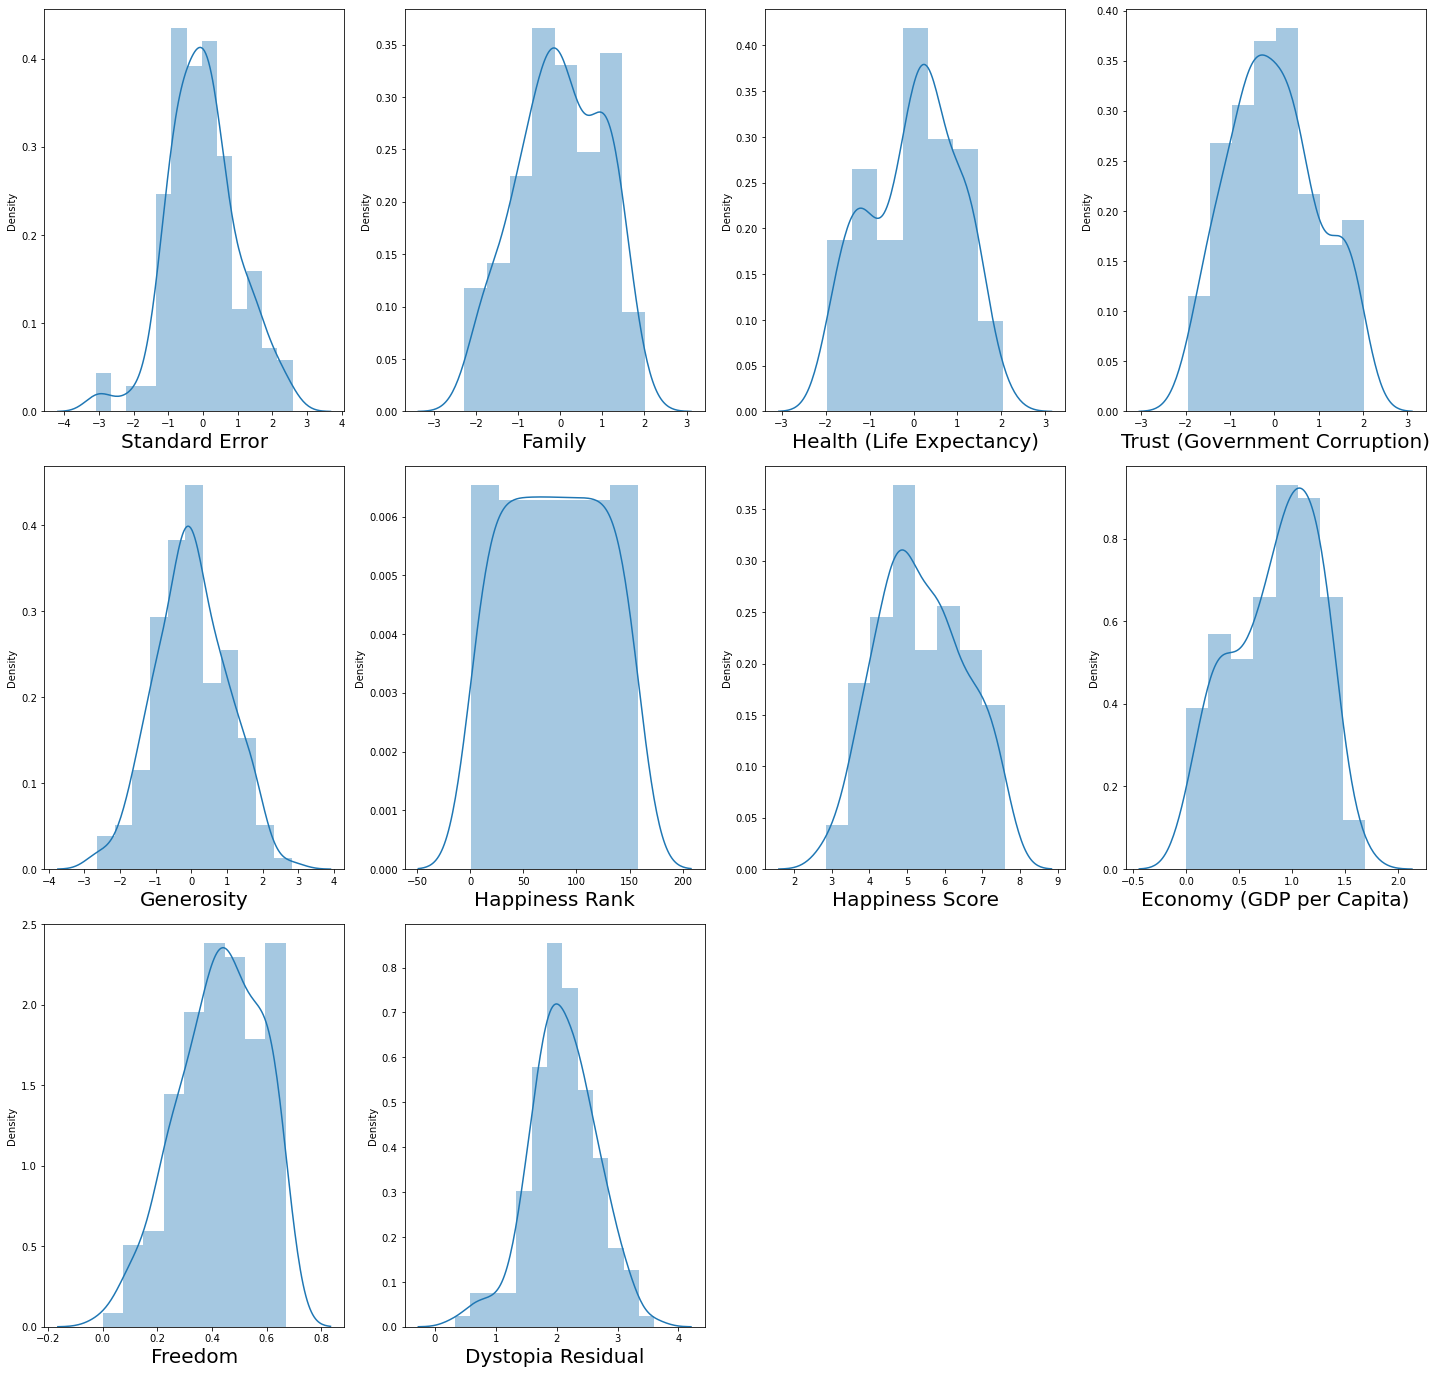

In [101]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in result:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(result[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()  

In [102]:
# In distplot analysis,It has been observed that Skeness of each featutre has been reduced.

In [103]:
#Lets check the skewness with  boxplot 

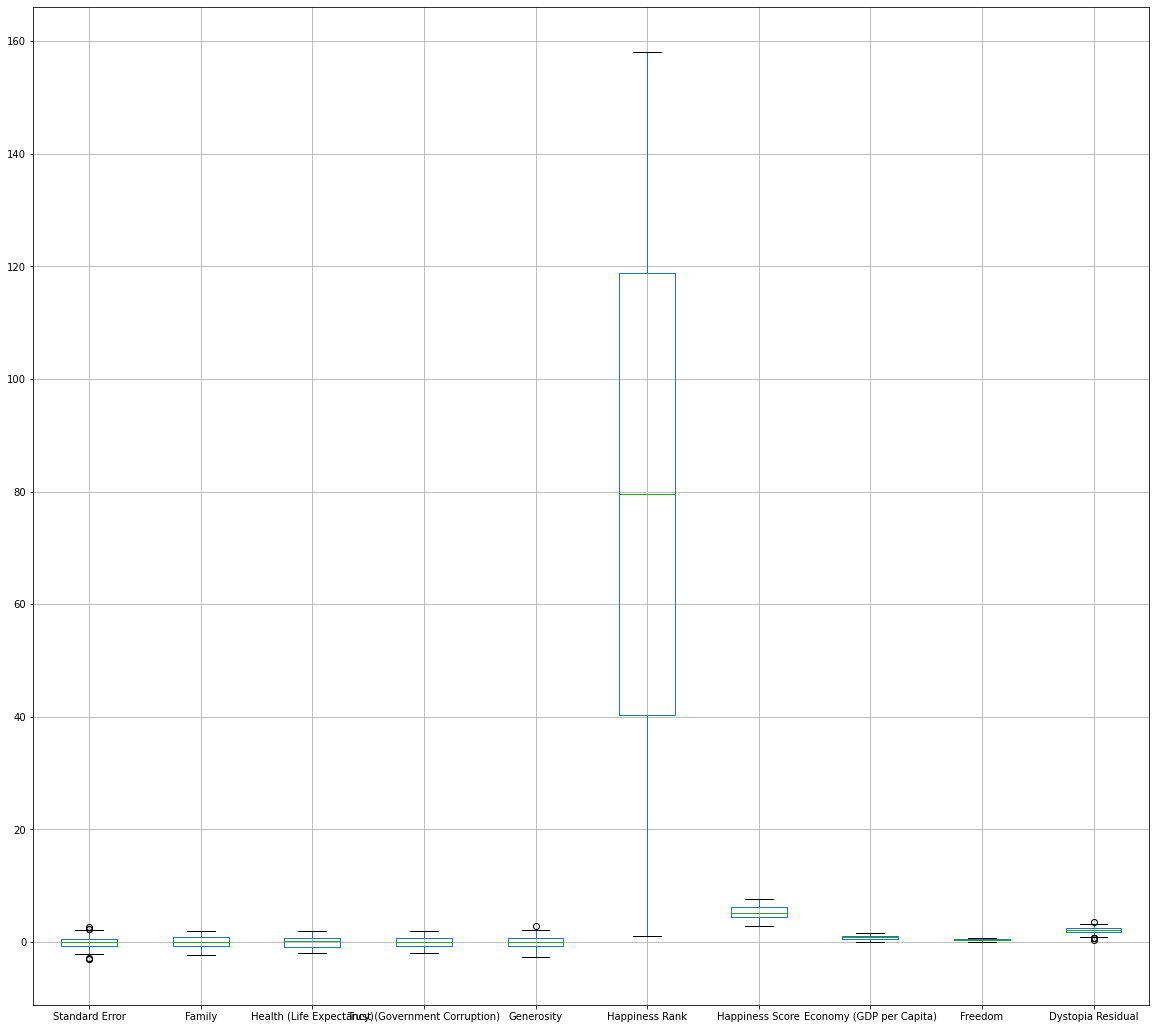

In [104]:
result.boxplot(figsize=[20,22],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [128]:
# Rename features in order to apply boxplot outlier treatment
x=result.rename(columns={'Dystopia Residual':'Dystopia','Standard Error':'Sterror'},inplace=True)
result.head()


Sterror    Family  Health (Life Expectancy)  \
0 -0.972226  1.669206                  1.491765   
1  0.309350  2.012132                  1.532348   
2 -1.062017  1.739586                  1.085223   
3 -0.503610  1.553118                  1.147600   
4 -0.823548  1.501726                  1.270179   

   Trust (Government Corruption)  Generosity  Happiness Rank  Happiness Score  \
0                       1.773991    0.622391               1            7.587   
1                       0.315993    1.480995               2            7.561   
2                       1.906792    0.927973               3            7.527   
3                       1.624007    0.964080               4            7.522   
4                       1.503484    1.592224               5            7.427   

   Economy (GDP per Capita)  Freedom  Dystopia  
0                   1.39651  0.66557   2.51738  
1                   1.30232  0.62877   2.70201  
2                   1.32548  0.64938   2.49204  
3                   1.45900  0.66973   2.46531  
4                   1.32629  0.63297   2.45176

In [129]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sterror                        158 non-null    float64
 1   Family                         158 non-null    float64
 2   Health (Life Expectancy)       158 non-null    float64
 3   Trust (Government Corruption)  158 non-null    float64
 4   Generosity                     158 non-null    float64
 5   Happiness Rank                 158 non-null    int64  
 6   Happiness Score                158 non-null    float64
 7   Economy (GDP per Capita)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Dystopia                       158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [130]:
q1=result.quantile(0.25)

#3rd quantile

q3=result.quantile(0.75)

# IQR

iqr=q3-q1

In [131]:
# Outlier treatment on higher side

In [132]:
index=np.where(result['Sterror']>(q3.Sterror +(1.5*iqr.Sterror)))
result=result.drop(result.index[index])
result.reset_index()



index   Sterror    Family  Health (Life Expectancy)  \
0        0 -0.972226  1.669206                  1.491765   
1        1  0.309350  2.012132                  1.532348   
2        2 -1.062017  1.739586                  1.085223   
3        3 -0.503610  1.553118                  1.147600   
4        4 -0.823548  1.501726                  1.270179   
..     ...       ...       ...                       ...   
150    153 -0.916014 -0.959885                 -0.939459   
151    154 -0.719479 -1.896644                 -1.276496   
152    155  0.399137 -1.690664                  0.262933   
153    156  1.926902 -1.796803                 -1.525700   
154    157  1.310323 -2.160397                 -1.371811   

     Trust (Government Corruption)  Generosity  Happiness Rank  \
0                         1.773991    0.622391               1   
1                         0.315993    1.480995               2   
2                         1.906792    0.927973               3   
3                         1.624007    0.964080               4   
4                         1.503484    1.592224               5   
..                             ...         ...             ...   
150                       2.012856    0.065304             154   
151                      -0.433835   -0.334169             155   
152                       0.738915    1.659336             156   
153                      -0.151946   -0.194829             157   
154                      -0.067326   -0.490415             158   

     Happiness Score  Economy (GDP per Capita)  Freedom  Dystopia  
0              7.587                   1.39651  0.66557   2.51738  
1              7.561                   1.30232  0.62877   2.70201  
2              7.527                   1.32548  0.64938   2.49204  
3              7.522                   1.45900  0.66973   2.46531  
4              7.427                   1.32629  0.63297   2.45176  
..               ...                       ...      ...       ...  
150            3.465                   0.22208  0.59201   0.67042  
151            3.340                   0.28665  0.48450   1.63328  
152            3.006                   0.66320  0.15684   0.32858  
153            2.905                   0.01530  0.11850   1.83302  
154            2.839                   0.20868  0.36453   1.56726  

[155 rows x 11 columns]

In [133]:
index=np.where(result['Generosity']>(q3.Generosity+(1.5*iqr.Generosity)))
result=result.drop(result.index[index])
result.reset_index()

index   Sterror    Family  Health (Life Expectancy)  \
0        0 -0.972226  1.669206                  1.491765   
1        1  0.309350  2.012132                  1.532348   
2        2 -1.062017  1.739586                  1.085223   
3        3 -0.503610  1.553118                  1.147600   
4        4 -0.823548  1.501726                  1.270179   
..     ...       ...       ...                       ...   
149    153 -0.916014 -0.959885                 -0.939459   
150    154 -0.719479 -1.896644                 -1.276496   
151    155  0.399137 -1.690664                  0.262933   
152    156  1.926902 -1.796803                 -1.525700   
153    157  1.310323 -2.160397                 -1.371811   

     Trust (Government Corruption)  Generosity  Happiness Rank  \
0                         1.773991    0.622391               1   
1                         0.315993    1.480995               2   
2                         1.906792    0.927973               3   
3                         1.624007    0.964080               4   
4                         1.503484    1.592224               5   
..                             ...         ...             ...   
149                       2.012856    0.065304             154   
150                      -0.433835   -0.334169             155   
151                       0.738915    1.659336             156   
152                      -0.151946   -0.194829             157   
153                      -0.067326   -0.490415             158   

     Happiness Score  Economy (GDP per Capita)  Freedom  Dystopia  
0              7.587                   1.39651  0.66557   2.51738  
1              7.561                   1.30232  0.62877   2.70201  
2              7.527                   1.32548  0.64938   2.49204  
3              7.522                   1.45900  0.66973   2.46531  
4              7.427                   1.32629  0.63297   2.45176  
..               ...                       ...      ...       ...  
149            3.465                   0.22208  0.59201   0.67042  
150            3.340                   0.28665  0.48450   1.63328  
151            3.006                   0.66320  0.15684   0.32858  
152            2.905                   0.01530  0.11850   1.83302  
153            2.839                   0.20868  0.36453   1.56726  

[154 rows x 11 columns]

In [134]:
index=np.where(result['Dystopia']>(q3.Dystopia +(1.5*iqr.Dystopia)))
result=result.drop(result.index[index])
result.reset_index()


index   Sterror    Family  Health (Life Expectancy)  \
0        0 -0.972226  1.669206                  1.491765   
1        1  0.309350  2.012132                  1.532348   
2        2 -1.062017  1.739586                  1.085223   
3        3 -0.503610  1.553118                  1.147600   
4        4 -0.823548  1.501726                  1.270179   
..     ...       ...       ...                       ...   
148    153 -0.916014 -0.959885                 -0.939459   
149    154 -0.719479 -1.896644                 -1.276496   
150    155  0.399137 -1.690664                  0.262933   
151    156  1.926902 -1.796803                 -1.525700   
152    157  1.310323 -2.160397                 -1.371811   

     Trust (Government Corruption)  Generosity  Happiness Rank  \
0                         1.773991    0.622391               1   
1                         0.315993    1.480995               2   
2                         1.906792    0.927973               3   
3                         1.624007    0.964080               4   
4                         1.503484    1.592224               5   
..                             ...         ...             ...   
148                       2.012856    0.065304             154   
149                      -0.433835   -0.334169             155   
150                       0.738915    1.659336             156   
151                      -0.151946   -0.194829             157   
152                      -0.067326   -0.490415             158   

     Happiness Score  Economy (GDP per Capita)  Freedom  Dystopia  
0              7.587                   1.39651  0.66557   2.51738  
1              7.561                   1.30232  0.62877   2.70201  
2              7.527                   1.32548  0.64938   2.49204  
3              7.522                   1.45900  0.66973   2.46531  
4              7.427                   1.32629  0.63297   2.45176  
..               ...                       ...      ...       ...  
148            3.465                   0.22208  0.59201   0.67042  
149            3.340                   0.28665  0.48450   1.63328  
150            3.006                   0.66320  0.15684   0.32858  
151            2.905                   0.01530  0.11850   1.83302  
152            2.839                   0.20868  0.36453   1.56726  

[153 rows x 11 columns]

In [124]:
# Outlier treatment on lower side

In [135]:
index=np.where(result['Sterror']<(q1.Sterror -(1.5*iqr.Sterror)))
result=result.drop(result.index[index])
result.reset_index()


index   Sterror    Family  Health (Life Expectancy)  \
0        0 -0.972226  1.669206                  1.491765   
1        1  0.309350  2.012132                  1.532348   
2        2 -1.062017  1.739586                  1.085223   
3        3 -0.503610  1.553118                  1.147600   
4        4 -0.823548  1.501726                  1.270179   
..     ...       ...       ...                       ...   
145    153 -0.916014 -0.959885                 -0.939459   
146    154 -0.719479 -1.896644                 -1.276496   
147    155  0.399137 -1.690664                  0.262933   
148    156  1.926902 -1.796803                 -1.525700   
149    157  1.310323 -2.160397                 -1.371811   

     Trust (Government Corruption)  Generosity  Happiness Rank  \
0                         1.773991    0.622391               1   
1                         0.315993    1.480995               2   
2                         1.906792    0.927973               3   
3                         1.624007    0.964080               4   
4                         1.503484    1.592224               5   
..                             ...         ...             ...   
145                       2.012856    0.065304             154   
146                      -0.433835   -0.334169             155   
147                       0.738915    1.659336             156   
148                      -0.151946   -0.194829             157   
149                      -0.067326   -0.490415             158   

     Happiness Score  Economy (GDP per Capita)  Freedom  Dystopia  
0              7.587                   1.39651  0.66557   2.51738  
1              7.561                   1.30232  0.62877   2.70201  
2              7.527                   1.32548  0.64938   2.49204  
3              7.522                   1.45900  0.66973   2.46531  
4              7.427                   1.32629  0.63297   2.45176  
..               ...                       ...      ...       ...  
145            3.465                   0.22208  0.59201   0.67042  
146            3.340                   0.28665  0.48450   1.63328  
147            3.006                   0.66320  0.15684   0.32858  
148            2.905                   0.01530  0.11850   1.83302  
149            2.839                   0.20868  0.36453   1.56726  

[150 rows x 11 columns]

In [136]:
index=np.where(result['Dystopia']<(q1.Dystopia -(1.5*iqr.Dystopia)))
result=result.drop(result.index[index])
result.reset_index()


index   Sterror    Family  Health (Life Expectancy)  \
0        0 -0.972226  1.669206                  1.491765   
1        1  0.309350  2.012132                  1.532348   
2        2 -1.062017  1.739586                  1.085223   
3        3 -0.503610  1.553118                  1.147600   
4        4 -0.823548  1.501726                  1.270179   
..     ...       ...       ...                       ...   
141    151 -0.114959 -0.707255                 -1.406673   
142    152 -1.338909 -1.970375                 -1.320450   
143    154 -0.719479 -1.896644                 -1.276496   
144    156  1.926902 -1.796803                 -1.525700   
145    157  1.310323 -2.160397                 -1.371811   

     Trust (Government Corruption)  Generosity  Happiness Rank  \
0                         1.773991    0.622391               1   
1                         0.315993    1.480995               2   
2                         1.906792    0.927973               3   
3                         1.624007    0.964080               4   
4                         1.503484    1.592224               5   
..                             ...         ...             ...   
141                       0.177581   -0.011617             152   
142                      -0.196665    1.077647             153   
143                      -0.433835   -0.334169             155   
144                      -0.151946   -0.194829             157   
145                      -0.067326   -0.490415             158   

     Happiness Score  Economy (GDP per Capita)  Freedom  Dystopia  
0              7.587                   1.39651  0.66557   2.51738  
1              7.561                   1.30232  0.62877   2.70201  
2              7.527                   1.32548  0.64938   2.49204  
3              7.522                   1.45900  0.66973   2.46531  
4              7.427                   1.32629  0.63297   2.45176  
..               ...                       ...      ...       ...  
141            3.587                   0.25812  0.39493   1.46494  
142            3.575                   0.31982  0.23414   1.95210  
143            3.340                   0.28665  0.48450   1.63328  
144            2.905                   0.01530  0.11850   1.83302  
145            2.839                   0.20868  0.36453   1.56726  

[146 rows x 11 columns]

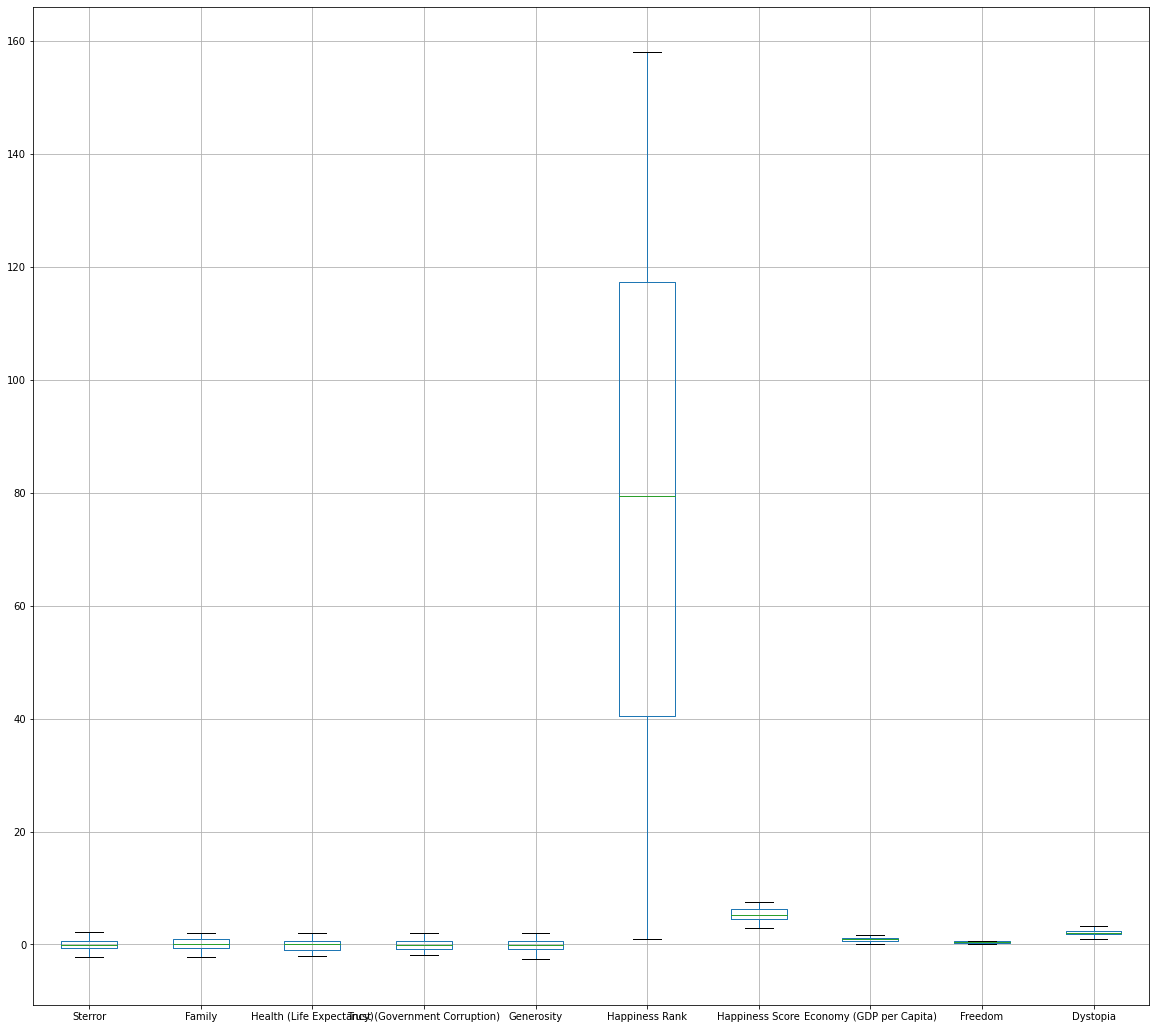

In [137]:
#Lchecking all features after outlier treatment

result.boxplot(figsize=[20,22],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [ ]:
# After Analyising the graph,we obserb that no outlier in feature

In [156]:
#splitting the independent and target variable in x and y
y=result['Happiness Score']
x=result.drop(columns=['Happiness Score'])

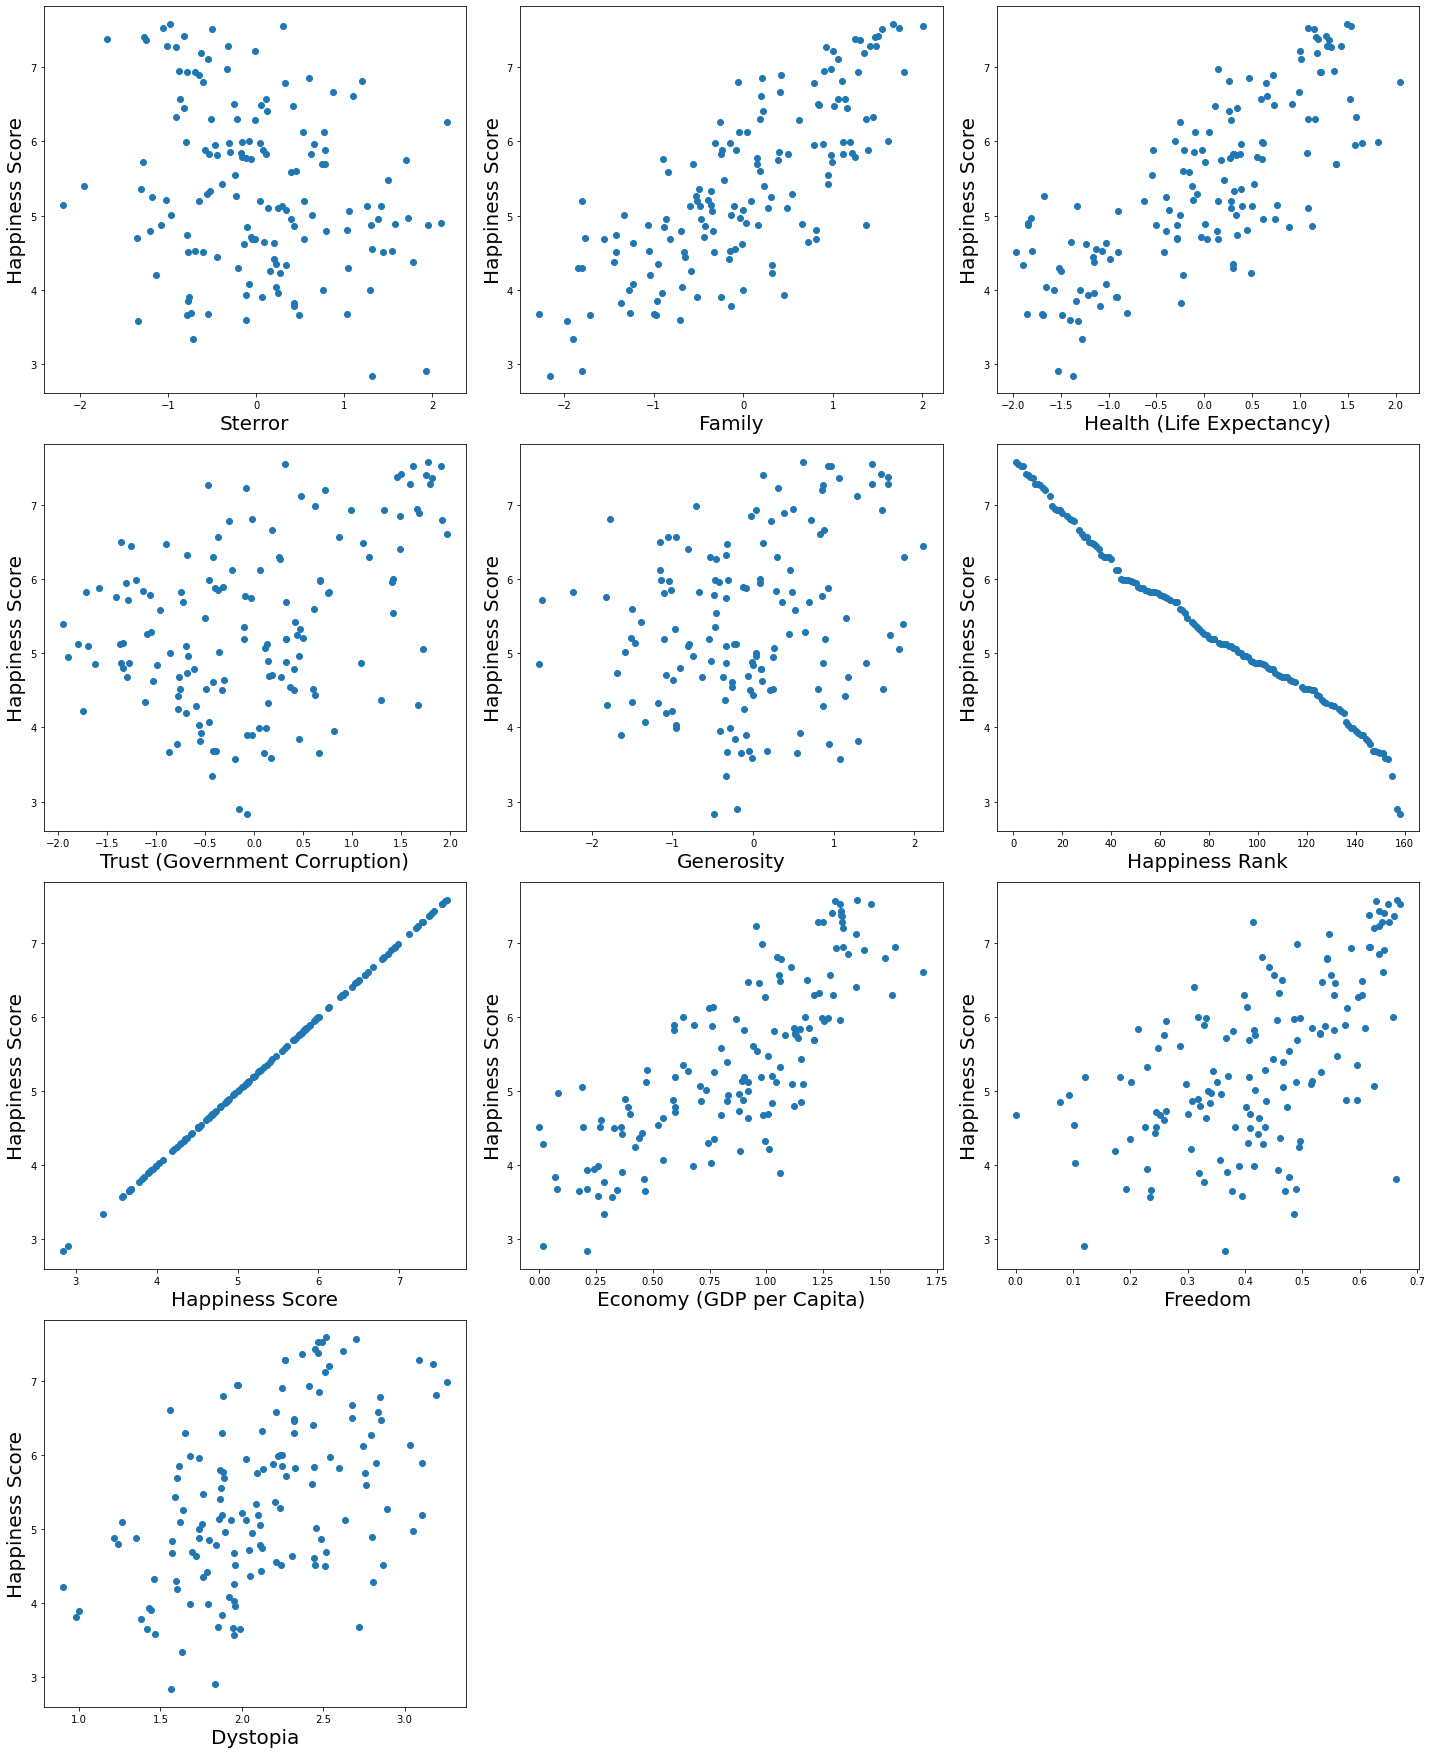

In [142]:
# Visualizing relationship



plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in result:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(result[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [2]:
# After analysis scatter plot,not popping up any features.Since each featutre has positive relation with the level

In [157]:
# Data Scalimg. Formula Z=(x-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [168]:
#Importing Library 
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


In [169]:
# Finding best random state

from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=mean_absolute_error(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.07430152848548194 on Random_state 174


In [ ]:
#we have found best random state value as 174.We will create train test split using this random state (174)

In [170]:
#Creating Train test split
x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=.30,random_state=maxRS)

In [173]:
 # training the Model
LR.fit(x_train,y_train)


0.07430152848548194


In [178]:
#Predict the Hapiness score based on given features for Test population
predLR=LR.predict(x_test)

In [179]:
preddt

array([5.18121436, 3.8882563 , 6.49109591, 4.48421755, 6.15688901,
       5.08758112, 4.08620371, 4.30773673, 6.08735481, 7.24411595,
       4.41448518, 6.8370927 , 5.71674132, 3.70132512, 7.45250594,
       3.58033202, 5.0966691 , 3.50791182, 6.38243399, 6.68956435,
       6.31504419, 6.36452099, 4.34406782, 7.38419447, 4.26783937,
       4.70453793, 3.8228952 , 4.94291856, 4.14412335, 5.84202168,
       4.77695447, 5.19947553, 5.19294339, 6.4525652 , 6.52525891,
       4.13888985, 5.0361944 , 6.07227502, 4.82187922, 5.83027553,
       6.74253786, 5.66865947, 3.69286789, 3.73731002])

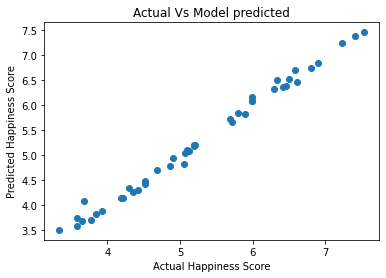

In [181]:
#lets plot and visualize
plt.scatter(y_test,preddt)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Vs Model predicted')
plt.show()

In [182]:
# lets check how well model fits 

#Adjusted R2 SCORE
LR.score(x_train,y_train)

0.9968784893554484

In [184]:
#Lets check how well model fits the test data
LR.score(x_test,y_test)


0.9917619678095221

In [185]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [187]:
y_pred=LR.predict(x_test)

In [188]:
mean_absolute_error(y_test,y_pred)

0.07430152848548194

In [189]:
mean_squared_error(y_test,y_pred)

0.01091682877202489

In [190]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.10448362920584683

In [ ]:
# lets see model is overfitting training data

In [ ]:
#Regulalization
# Lasso L1
#Ridge  L2
#ELASTICNET

In [191]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [192]:
lassCV= LassoCV(alphas=None,max_iter=1000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [193]:
# best Alpha parameter (Alpha = learning rate)
alpha =lassCV.alpha_
alpha

0.00010896732253028329

In [194]:
# now that we have best parameter,lets use lasso regression and see how well our data ftted befor
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010896732253028329)

In [195]:
lasso_reg.score(x_test,y_test)

0.991822788874353

In [196]:
# using Ridge regression model
ridgecv=RidgeCV(alphas=np.arange(.001,0.1,.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [197]:
ridgecv.alpha_

0.001

In [198]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [199]:
ridge_model.score(x_test,y_test)

0.991763752927986

In [ ]:
# Please write the conclusion

Our Linear Model is not overfitted